In [1]:
import pandas as pd 
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.isnull().sum().sum()

866

In [11]:
df.isnull().sum()/df.shape[0] * 100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.865
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         77.104
Embarked       0.224
dtype: float64

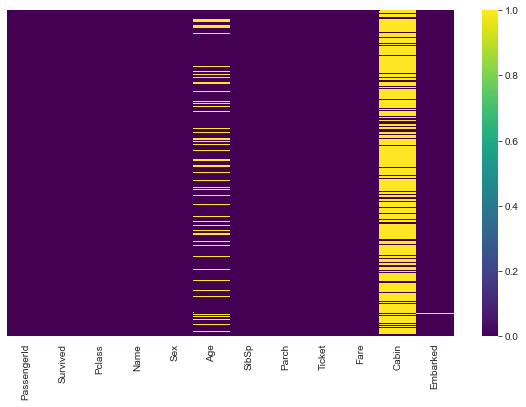

In [13]:
sns.heatmap(df.isnull(), yticklabels = False , cmap = 'viridis');

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


In [15]:
df.describe(include = "O").T

,count,unique,top,freq
Name,891,891,"Allen, Miss. Elisabeth Walton",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [16]:
df.select_dtypes(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [17]:
object_col = df.select_dtypes(include = 'object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [20]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna = False))
    print("--"*20)

Name
----------------
Allen, Miss. Elisabeth Walton            1
Celotti, Mr. Francesco                   1
Meyer, Mrs. Edgar Joseph (Leila Saks)    1
Mernagh, Mr. Robert                      1
Asplund, Master. Edvin Rojj Felix        1
                                        ..
Rekic, Mr. Tido                          1
Isham, Miss. Ann Elizabeth               1
Rugg, Miss. Emily                        1
Cribb, Mr. John Hatfield                 1
Silven, Miss. Lyyli Karoliina            1
Name: Name, Length: 891, dtype: int64
----------------------------------------
Sex
----------------
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------
Ticket
----------------
CA. 2343     7
347082       7
1601         7
3101295      6
347088       6
            ..
237671       1
113503       1
14311        1
14313        1
Fa 265302    1
Name: Ticket, Length: 681, dtype: int64
----------------------------------------
Cabin
----------------
NaN            687


# Let's Examine the Columns in Detail

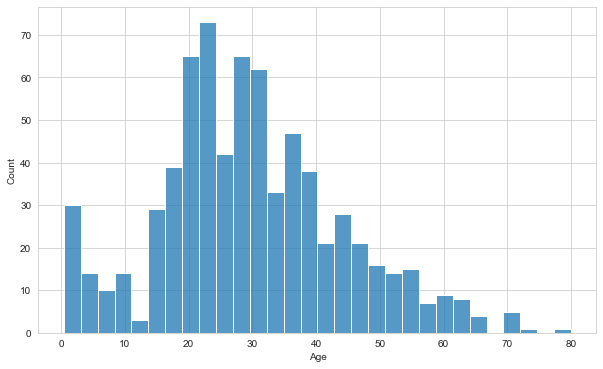

In [22]:
sns.histplot(data = df, x = 'Age' , kde = False , bins = 30);

In [23]:
mean = df.Age.mean()

In [24]:
median = df.Age.median()

In [25]:
print(f'Age mean: {mean}\nAge median: {median}')

Age mean: 29.69911764705882
Age median: 28.0


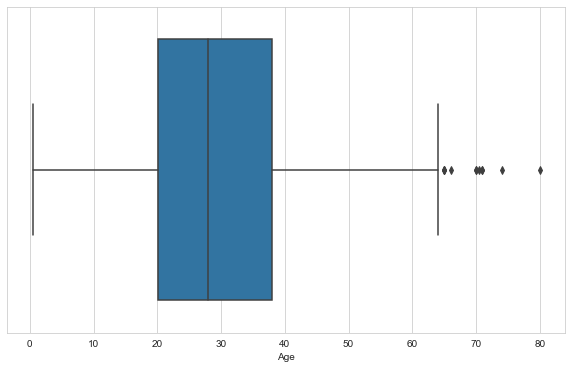

In [26]:
sns.boxplot(data = df, x = 'Age');

In [27]:
df.groupby('Pclass').Age.median()

Pclass
1   37.000
2   29.000
3   24.000
Name: Age, dtype: float64

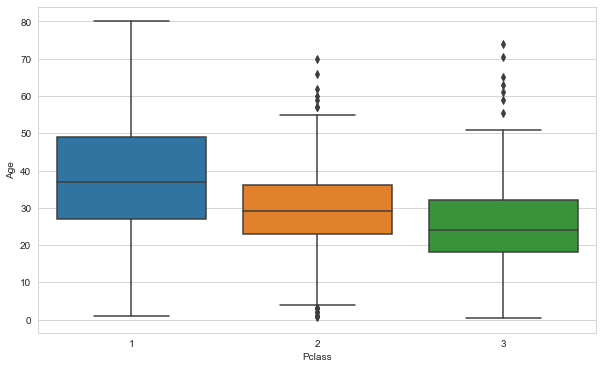

In [28]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age');

In [31]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female   35.000
        male     40.000
2       female   28.000
        male     30.000
3       female   21.500
        male     25.000
Name: Age, dtype: float64

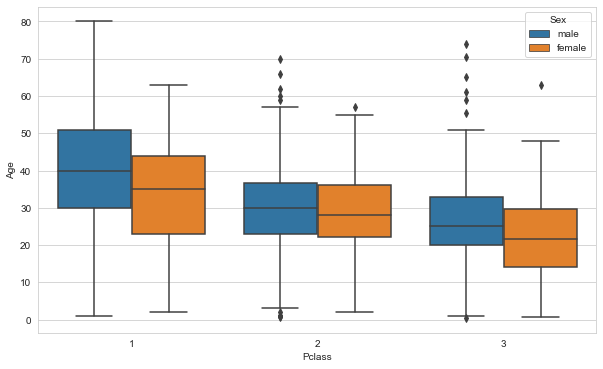

In [32]:
sns.boxplot(data = df , x = 'Pclass' , y = 'Age' , hue = 'Sex');

In [34]:
df.groupby(['Pclass', 'Sex']).Age.transform("median")

0     25.000
1     35.000
2     21.500
3     35.000
4     25.000
       ...  
886   30.000
887   35.000
888   21.500
889   40.000
890   25.000
Name: Age, Length: 891, dtype: float64

In [36]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex']).Age.transform("median"))

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df.drop('Cabin', axis = 1, inplace = True)

In [40]:
df.dropna(inplace = True)

In [41]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
df.Survived.value_counts(normalize = True)

0   0.618
1   0.382
Name: Survived, dtype: float64

In [43]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

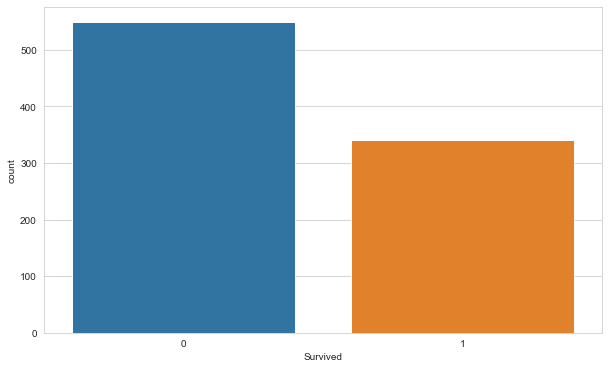

In [44]:
sns.countplot(data = df , x = 'Survived');

# Sex

In [45]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

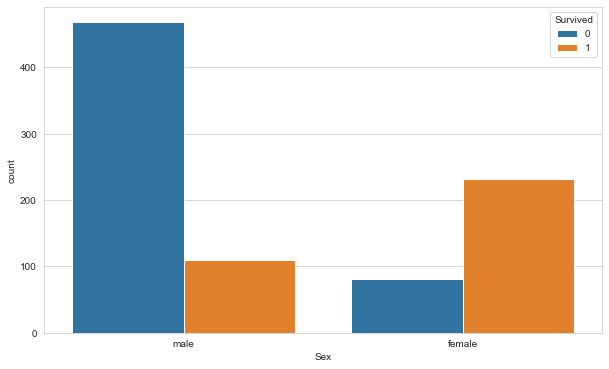

In [46]:
sns.countplot(data=df, x='Sex',hue='Survived');

In [47]:
df.groupby("Sex").Survived.value_counts(normalize=True)

Sex     Survived
female  1          0.740
        0          0.260
male    0          0.811
        1          0.189
Name: Survived, dtype: float64

In [48]:
survive = df.groupby(["Sex"])["Survived"].value_counts(normalize=True)
survive

Sex     Survived
female  1          0.740
        0          0.260
male    0          0.811
        1          0.189
Name: Survived, dtype: float64

In [49]:
survive = pd.DataFrame(survive)
survive.rename(columns = {"Survived" : "ratio"} , inplace = True)
survive.reset_index(inplace = True)
survive

,Sex,Survived,ratio
0,female,1,0.740
1,female,0,0.260
2,male,0,0.811
3,male,1,0.189


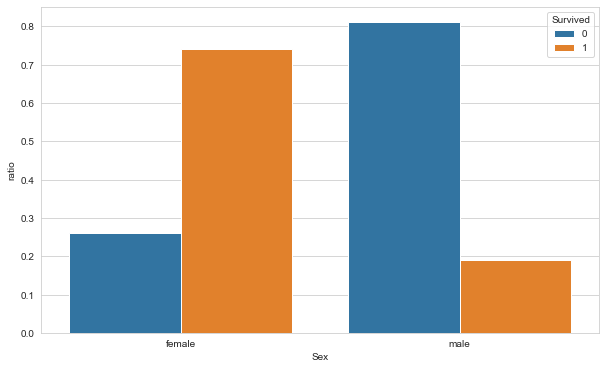

In [51]:
sns.barplot(data = survive , x = 'Sex', y = 'ratio' ,hue = 'Survived' , ci=None);

# Pclass

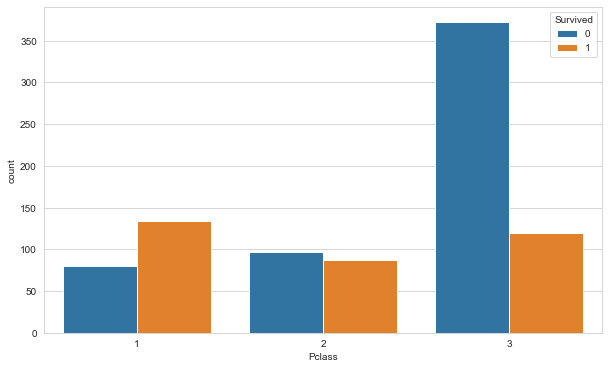

In [52]:
sns.countplot(data = df, x = 'Pclass' , hue ='Survived');

# SibSp

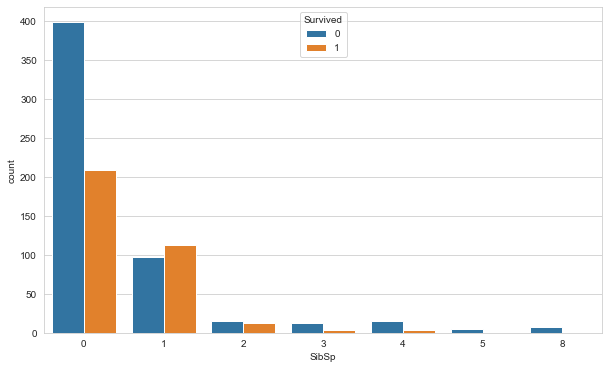

In [53]:
sns.countplot(data = df, x = 'SibSp' , hue = 'Survived');

In [ ]:
Parch

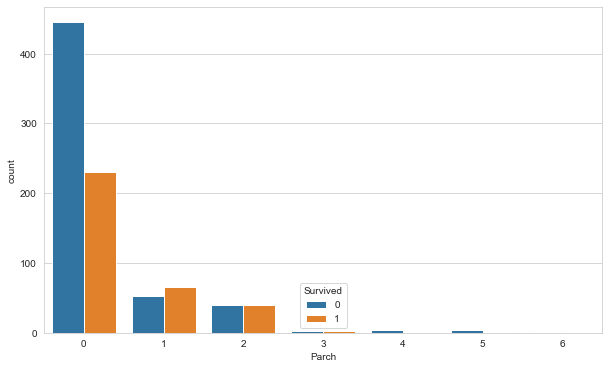

In [54]:
sns.countplot(data = df, x='Parch' , hue= 'Survived');

In [ ]:
Embarked

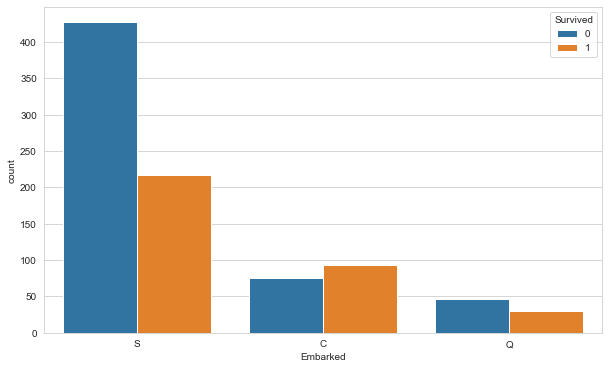

In [55]:
sns.countplot(data=df,x='Embarked',hue='Survived');

In [ ]:
Age

In [56]:
df.groupby("Survived").Age.median()

Survived
0   25.000
1   27.000
Name: Age, dtype: float64

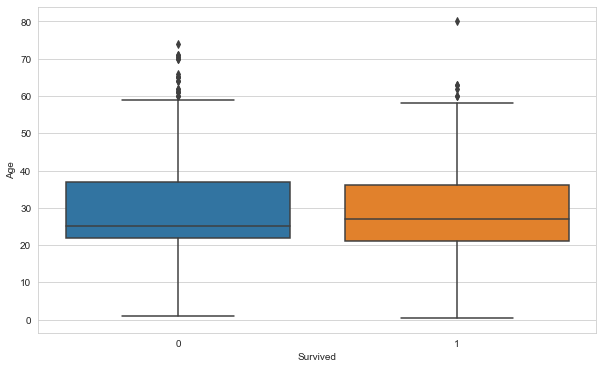

In [57]:
sns.boxplot(data = df, x = 'Survived', y = 'Age');

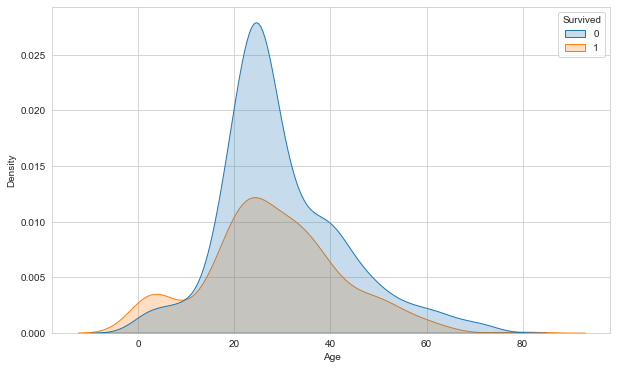

In [58]:
sns.kdeplot(data = df, x = 'Age', hue = 'Survived', fill = True);

In [ ]:
Fare

In [59]:
df.groupby("Survived").Fare.median()

Survived
0   10.500
1   26.000
Name: Fare, dtype: float64

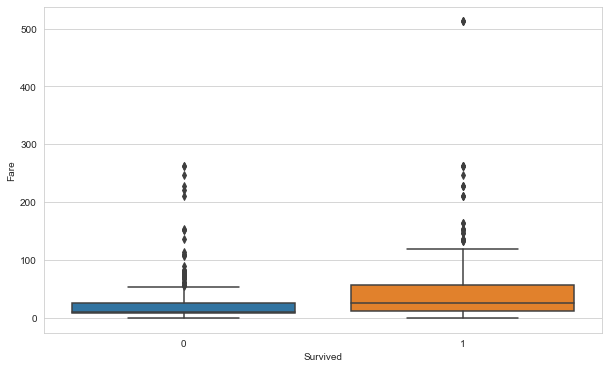

In [60]:
sns.boxplot(data=df,x='Survived',y='Fare');

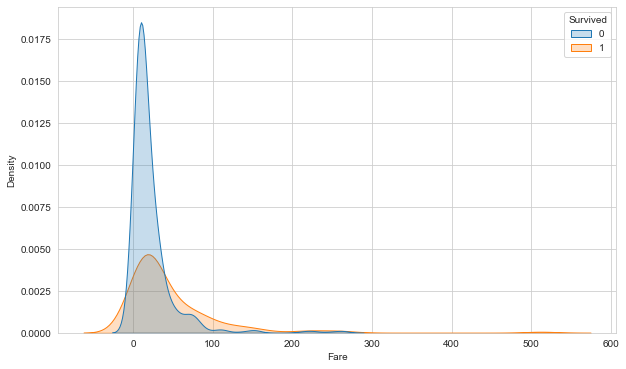

In [62]:
sns.kdeplot(data = df , x = 'Fare', hue = 'Survived', fill =True);

In [63]:
df.Ticket.value_counts(dropna = False).head()

1601        7
347082      7
CA. 2343    7
CA 2144     6
3101295     6
Name: Ticket, dtype: int64

In [64]:
df.Ticket.value_counts(dropna = False).tail()

113503       1
14311        1
14313        1
PC 17592     1
Fa 265302    1
Name: Ticket, dtype: int64

In [65]:
ticket = df.Ticket.value_counts()
ticket

1601         7
347082       7
CA. 2343     7
CA 2144      6
3101295      6
            ..
113503       1
14311        1
14313        1
PC 17592     1
Fa 265302    1
Name: Ticket, Length: 680, dtype: int64

In [66]:
ticket[ticket != 1]

1601               7
347082             7
CA. 2343           7
CA 2144            6
3101295            6
                  ..
31027              2
349237             2
345764             2
A/5. 3336          2
S.C./PARIS 2079    2
Name: Ticket, Length: 133, dtype: int64

In [67]:
group_list = list(ticket[ticket != 1].index)
group_list

['1601',
 '347082',
 'CA. 2343',
 'CA 2144',
 '3101295',
 '347088',
 '382652',
 'S.O.C. 14879',
 '113760',
 '4133',
 '19950',
 '349909',
 '17421',
 '113781',
 'PC 17757',
 '347077',
 'LINE',
 '2666',
 'W./C. 6608',
 '35273',
 '230080',
 '345773',
 '239853',
 '13502',
 'F.C.C. 13529',
 '24160',
 '248727',
 'PC 17582',
 '371110',
 'PC 17760',
 'C.A. 34651',
 '110413',
 '347742',
 'PC 17572',
 '363291',
 'PC 17755',
 '110152',
 'SC/Paris 2123',
 '29106',
 'C.A. 31921',
 '113776',
 'P/PP 3381',
 'PC 17485',
 '364516',
 '347054',
 '2691',
 'WE/P 5735',
 '19943',
 '2651',
 '13507',
 '16966',
 'C.A. 33112',
 '19996',
 '12749',
 'C.A. 37671',
 '230433',
 '230136',
 '2665',
 '370129',
 '2627',
 '19877',
 'PP 9549',
 '113803',
 '250655',
 '36973',
 '367226',
 '239865',
 '231919',
 '17474',
 'S.O./P.P. 3',
 '392096',
 '244252',
 'PC 17558',
 '243847',
 '7534',
 '250649',
 '28403',
 '36947',
 '113789',
 '26360',
 '110465',
 '11751',
 'C.A. 2673',
 '2668',
 '35281',
 '36928',
 '54636',
 '364849',
 

In [69]:
df["is_group"] = df.Ticket.isin(group_list) * 1
df.is_group

0      0
1      0
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: is_group, Length: 889, dtype: int32

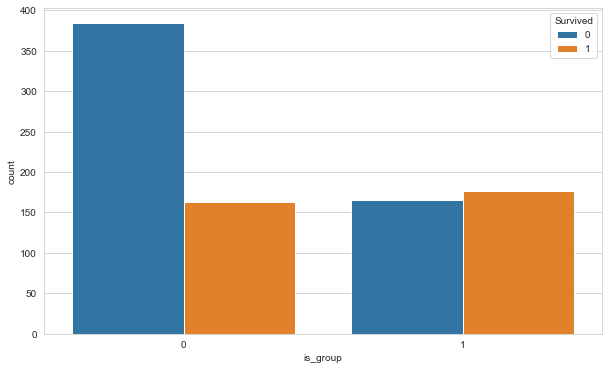

In [70]:

sns.countplot(data=df, x='is_group', hue='Survived');

In [71]:
((df.SibSp == 0) & (df.Parch == 0))

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 889, dtype: bool

In [72]:
False * 1

0

In [73]:
True * 1

1

In [74]:
df["is_alone"] = ((df.SibSp == 0) & (df.Parch == 0)) * 1
df.is_alone

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: is_alone, Length: 889, dtype: int32

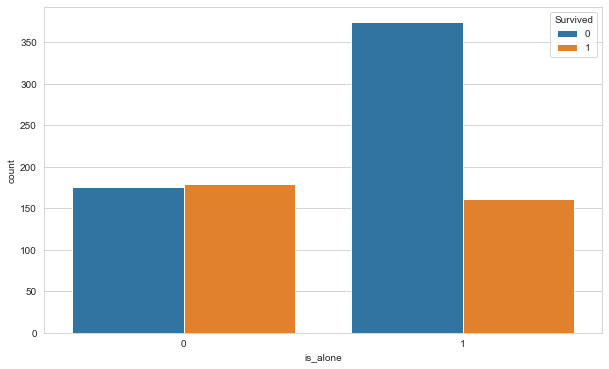

In [75]:
sns.countplot(data = df, x = 'is_alone', hue = 'Survived');

In [76]:
df.groupby("is_group").is_alone.value_counts()

is_group  is_alone
0         1           462
          0            85
1         0           269
          1            73
Name: is_alone, dtype: int64

In [77]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

In [79]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
574,575,0,3,"Rush, Mr. Alfred George John",male,16.000,0,0,A/4. 20589,8.050,S,0,1
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.000,1,1,C.A. 37671,15.900,S,1,0
262,263,0,1,"Taussig, Mr. Emil",male,52.000,1,1,110413,79.650,S,1,0
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.000,0,1,24160,211.338,S,1,0
512,513,1,1,"McGough, Mr. James Robert",male,36.000,0,0,PC 17473,26.288,S,0,1
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.500,0,0,2683,6.438,C,0,1
743,744,0,3,"McNamee, Mr. Neal",male,24.000,1,0,376566,16.100,S,0,0
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,21.500,0,2,2668,22.358,C,1,0
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.000,1,0,STON/O2. 3101279,15.850,S,1,0
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.000,0,0,349205,7.896,S,0,1


In [80]:
df.Name.str.extract("\w\.\s(\w*\s*\w*)")

,0
0,Owen Harris
1,John Bradley
2,Laina
3,Jacques Heath
4,William Henry
...,...
886,Juozas
887,Margaret Edith
888,Catherine Helen
889,Karl Howell


In [81]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 889, dtype: object

In [82]:
df.Ticket.str.extract("(\d*)$")

,0
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,6607
889,111369


In [83]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")

In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,21171,7.250,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,17599,71.283,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,3101282,7.925,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,0,1


In [ ]:
Dropping Unnecessary Features

In [85]:
df_final = df.drop(['PassengerId','Name','Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,1,0,7.250,S,0,0
1,1,1,female,38.000,1,0,71.283,C,0,0
2,1,3,female,26.000,0,0,7.925,S,0,1
3,1,1,female,35.000,1,0,53.100,S,1,0
4,0,3,male,35.000,0,0,8.050,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,0,0,13.000,S,0,1
887,1,1,female,19.000,0,0,30.000,S,0,1
888,0,3,female,21.500,1,2,23.450,S,1,0
889,1,1,male,26.000,0,0,30.000,C,0,1


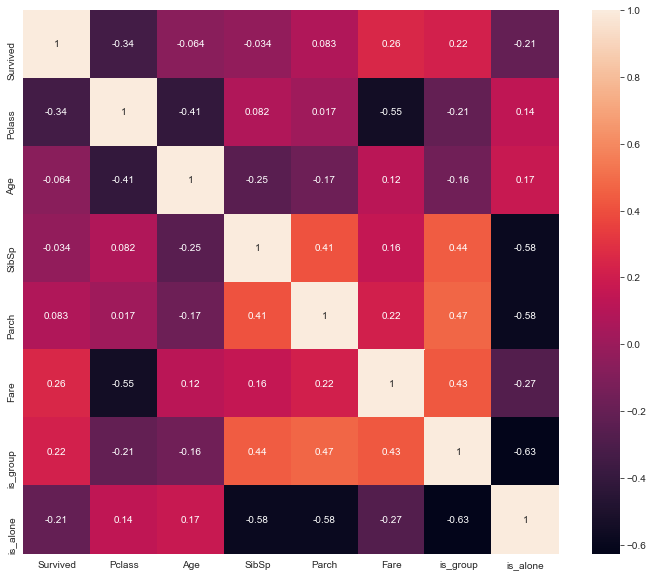

In [88]:
plt.figure(figsize = (12,10))
sns.heatmap(df_final.corr(), annot=True);

In [89]:
df_final = df_final.drop(['SibSp','Parch'], axis=1)
df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,is_group,is_alone
0,0,3,male,22.000,7.250,S,0,0
1,1,1,female,38.000,71.283,C,0,0
2,1,3,female,26.000,7.925,S,0,1
3,1,1,female,35.000,53.100,S,1,0
4,0,3,male,35.000,8.050,S,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000,13.000,S,0,1
887,1,1,female,19.000,30.000,S,0,1
888,0,3,female,21.500,23.450,S,1,0
889,1,1,male,26.000,30.000,C,0,1


In [91]:
df_dummy = pd.get_dummies(data = df_final, drop_first = True)
df_dummy

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000,7.250,0,0,1,0,1
1,1,1,38.000,71.283,0,0,0,0,0
2,1,3,26.000,7.925,0,1,0,0,1
3,1,1,35.000,53.100,1,0,0,0,1
4,0,3,35.000,8.050,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000,13.000,0,1,1,0,1
887,1,1,19.000,30.000,0,1,0,0,1
888,0,3,21.500,23.450,1,0,0,0,1
889,1,1,26.000,30.000,0,1,1,0,0


In [92]:
df_dummy = pd.get_dummies(data = df, columns = ['Pclass'], drop_first = True)
df_dummy

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.000,1,0,21171,7.250,S,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,17599,71.283,C,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,0,0,3101282,7.925,S,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,S,1,0,0,0
4,5,0,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,S,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,S,0,1,1,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,S,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.500,1,2,6607,23.450,S,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C,0,1,0,0
